In [96]:
data_to_commu = 'objcommu_after_modbp.pkl'

In [82]:
import pickle
from mixmod_wt.Status import Status

In [97]:
with open('./'+data_to_commu,'rb') as f:
    modbp_comm = pickle.load(f)

In [44]:
mypath = './netsForcomparingBaseline/_networks/'
import os
from os import listdir
from os.path import isfile, join
onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath,f))]

In [84]:
def modQM_calc(idx):
    
    modularities = {}
#     for filename in files:
    filename = alpha[idx]
    weighted = 0
    ml_network, layer, node_l, node_c, top, bot, couple, edge_l, edge_c, mu, commu = read_raw_network(mypath+filename,weighted)
    commu = modbp_comm[filename]
    #ml_network =build_network(layer, node_l, node_c, top, bot, couple, edge_l, edge_c)
    #with open(filename+'_ml_network.pickle', 'w') as handle:
    #	 pickle.dump([ml_network, layer, node_l, node_c, top, bot, couple, edge_l, edge_c, mu, commu], handle)
#     dendogram, mod = louvain(ml_network, layer, node_l, node_c, top, bot, couple, edge_l, edge_c, mu)
    
    ml_network
    status = Status()
    status.layer=layer
    status.node_l=node_l
    status.node_c=node_c
    status.top=top
    status.bot=bot
    status.edge_l=edge_l
    status.edge_c=edge_c
    status.couple = couple
    status.mu = mu
#     mod_old = mod
#     commu =_get_com_wise_nodes(partition_at_level(dendogram, len(dendogram)-1))
    #commu =_get_commu_dict(partition_at_level(dendogram, len(dendogram)-1))
    mod = __modularity(commu, status, ml_network)
    modularities[filename] = mod
    res[filename]=mod
    print(25*'#')
    
    return modularities
#     return modularities

In [86]:
cols = ['network','alpha','p','mu','p1','p2','rand']
rp = {}
for file in onlyfiles:
    m_p = {}
    arr = file.split('_')
    for idx,item in enumerate(cols):
        m_p[item] = arr[idx]
    rp[file] = m_p

In [88]:
alpha = []
for key in rp.keys():
    if rp[key]['mu'] == '0.05' and rp[key]['p'] == '0.8' and rp[key]['p1']== '0.8' and rp[key]['p2']=='0.0':
        alpha.append(key)
        
for key in rp.keys():
    if rp[key]['alpha'] == '0.6' and rp[key]['p'] == '0.8' and rp[key]['p1']== '0.8' and rp[key]['p2']=='0.0':
        alpha.append(key)

for key in rp.keys():
    if rp[key]['alpha'] == '0.6' and rp[key]['mu'] == '0.05' and rp[key]['p1']== '0.8' and rp[key]['p2']=='0.0':
        alpha.append(key)

for key in rp.keys():
    if rp[key]['alpha'] == '0.6' and rp[key]['mu'] == '0.05' and rp[key]['p']== '0.8' and rp[key]['p2']=='0.0':
        alpha.append(key)
        
for key in rp.keys():
    if rp[key]['alpha'] == '0.6' and rp[key]['mu'] == '0.05' and rp[key]['p1']== '0.8' and rp[key]['p']=='0.8':
        alpha.append(key)

In [89]:
alpha,len(alpha)

(['network_0.8_0.8_0.05_0.8_0.0_6',
  'network_0.2_0.8_0.05_0.8_0.0_6',
  'network_0.4_0.8_0.05_0.8_0.0_6',
  'network_0.6_0.8_0.05_0.8_0.0_6',
  'network_0.6_0.8_0.1_0.8_0.0_6',
  'network_0.6_0.8_0.2_0.8_0.0_6',
  'network_0.6_0.8_0.05_0.8_0.0_6',
  'network_0.6_0.8_0.3_0.8_0.0_6',
  'network_0.6_0.6_0.05_0.8_0.0_6',
  'network_0.6_0.2_0.05_0.8_0.0_6',
  'network_0.6_0.4_0.05_0.8_0.0_6',
  'network_0.6_0.8_0.05_0.8_0.0_6',
  'network_0.6_0.8_0.05_0.2_0.0_6',
  'network_0.6_0.8_0.05_0.4_0.0_6',
  'network_0.6_0.8_0.05_0.6_0.0_6',
  'network_0.6_0.8_0.05_0.8_0.0_6',
  'network_0.6_0.8_0.05_0.8_0.1_6',
  'network_0.6_0.8_0.05_0.8_0.3_6',
  'network_0.6_0.8_0.05_0.8_0.0_6',
  'network_0.6_0.8_0.05_0.8_0.2_6'],
 20)

In [98]:
import multiprocessing as mp_proc
pool = mp_proc.Pool(processes=20)
results = pool.map(modQM_calc,range(len(alpha)))
print(results)

./netsForcomparingBaseline/_networks/network_0.8_0.8_0.05_0.8_0.0_6
./netsForcomparingBaseline/_networks/network_0.2_0.8_0.05_0.8_0.0_6
./netsForcomparingBaseline/_networks/network_0.4_0.8_0.05_0.8_0.0_6
./netsForcomparingBaseline/_networks/network_0.6_0.8_0.05_0.8_0.0_6
./netsForcomparingBaseline/_networks/network_0.6_0.8_0.1_0.8_0.0_6
./netsForcomparingBaseline/_networks/network_0.6_0.8_0.05_0.8_0.0_6
./netsForcomparingBaseline/_networks/network_0.6_0.8_0.2_0.8_0.0_6
./netsForcomparingBaseline/_networks/network_0.6_0.6_0.05_0.8_0.0_6
./netsForcomparingBaseline/_networks/network_0.6_0.8_0.3_0.8_0.0_6
./netsForcomparingBaseline/_networks/network_0.6_0.2_0.05_0.8_0.0_6
./netsForcomparingBaseline/_networks/network_0.6_0.8_0.05_0.8_0.0_6
./netsForcomparingBaseline/_networks/network_0.6_0.4_0.05_0.8_0.0_6
./netsForcomparingBaseline/_networks/network_0.6_0.8_0.05_0.2_0.0_6
./netsForcomparingBaseline/_networks/network_0.6_0.8_0.05_0.4_0.0_6
./netsForcomparingBaseline/_networks/network_0.6_0.

In [5]:
ans = [{'network_0.8_0.8_0.05_0.8_0.0_6': 0.4054591133348414}, {'network_0.2_0.8_0.05_0.8_0.0_6': 0.28829017712089144}, {'network_0.4_0.8_0.05_0.8_0.0_6': 0.2911110546981782}, {'network_0.6_0.8_0.05_0.8_0.0_6': 0.35714741863125166}, {'network_0.6_0.8_0.1_0.8_0.0_6': 0.29328865820647493}, {'network_0.6_0.8_0.2_0.8_0.0_6': 0.15745954758124653}, {'network_0.6_0.8_0.05_0.8_0.0_6': 0.35714741863125166}, {'network_0.6_0.8_0.3_0.8_0.0_6': 0.1225475000772336}, {'network_0.6_0.6_0.05_0.8_0.0_6': 0.33226399466431716}, {'network_0.6_0.2_0.05_0.8_0.0_6': 0.21240507276635742}, {'network_0.6_0.4_0.05_0.8_0.0_6': 0.23693851199608412}, {'network_0.6_0.8_0.05_0.8_0.0_6': 0.35714741863125166}, {'network_0.6_0.8_0.05_0.2_0.0_6': 0.22338389500958125}, {'network_0.6_0.8_0.05_0.4_0.0_6': 0.23596567034801802}, {'network_0.6_0.8_0.05_0.6_0.0_6': 0.253725998934284}, {'network_0.6_0.8_0.05_0.8_0.0_6': 0.35714741863125166}, {'network_0.6_0.8_0.05_0.8_0.1_6': 0.30542588554905803}, {'network_0.6_0.8_0.05_0.8_0.3_6': 0.3565959480079806}, {'network_0.6_0.8_0.05_0.8_0.0_6': 0.35714741863125166}, {'network_0.6_0.8_0.05_0.8_0.2_6': 0.3831421822145909}]
Q_m = {}
for item in ans:
    for key in item.keys():
        Q_m[key] = item[key]

In [7]:
import pickle
def save_obj(obj, name ):
    with open('./obj'+ name + '.pkl', 'wb') as f:
        pickle.dump(obj, f, 2)

def load_obj(name ):
    with open('./obj' + name + '.pkl', 'rb') as f:
        return pickle.load(f)
    
save_obj(Q_m,'Q_m_scores_for_LFR_networks')

In [28]:
cols = ['network','alpha','p','mu','p1','p2','rand']

In [31]:
rp = {}
for file in onlyfiles:
    m_p = {}
    arr = file.split('_')
    for idx,item in enumerate(cols):
        m_p[item] = arr[idx]
    rp[file] = m_p

In [35]:
rp

{'network_0.2_0.8_0.05_0.2_0.1_6': {'network': 'network',
  'alpha': '0.2',
  'p': '0.8',
  'mu': '0.05',
  'p1': '0.2',
  'p2': '0.1',
  'rand': '6'},
 'network_0.8_0.8_0.05_0.2_0.1_6': {'network': 'network',
  'alpha': '0.8',
  'p': '0.8',
  'mu': '0.05',
  'p1': '0.2',
  'p2': '0.1',
  'rand': '6'},
 'network_0.8_0.8_0.05_0.8_0.1_6': {'network': 'network',
  'alpha': '0.8',
  'p': '0.8',
  'mu': '0.05',
  'p1': '0.8',
  'p2': '0.1',
  'rand': '6'},
 'network_0.2_0.2_0.05_0.2_0.1_6': {'network': 'network',
  'alpha': '0.2',
  'p': '0.2',
  'mu': '0.05',
  'p1': '0.2',
  'p2': '0.1',
  'rand': '6'},
 'network_0.8_0.2_0.05_0.2_0.1_6': {'network': 'network',
  'alpha': '0.8',
  'p': '0.2',
  'mu': '0.05',
  'p1': '0.2',
  'p2': '0.1',
  'rand': '6'},
 'network_0.2_0.6_0.05_0.2_0.1_6': {'network': 'network',
  'alpha': '0.2',
  'p': '0.6',
  'mu': '0.05',
  'p1': '0.2',
  'p2': '0.1',
  'rand': '6'},
 'network_0.2_0.2_0.05_0.8_0.1_6': {'network': 'network',
  'alpha': '0.2',
  'p': '0.2'

In [102]:
mod = {}
for item in results:
    for key in item.keys():
        mod[key] = item[key]

(['0.2', '0.4', '0.6', '0.8'], [0.28829017712089144, 0.2911110546981782, 0.35714741863125166, 0.4054591133348414])


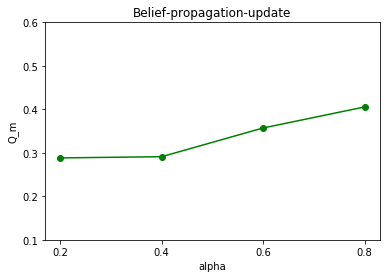

In [103]:
### varying alpha new
x = []
y = []
r_y = {}
for key in rp.keys():
    if rp[key]['mu'] == '0.05' and rp[key]['p'] == '0.8' and rp[key]['p1']== '0.8' and rp[key]['p2']=='0.0':
        x.append(rp[key]['alpha'])
        y.append(mod[key])
        r_y[x[-1]] = y[-1]

x = []
y = []
for key in sorted(r_y.keys()):
    y.append(r_y[key])
    x.append(key)
import matplotlib.pyplot as plt
        
print(x,y)
import matplotlib.pyplot as plt


# plot a line chart
plt.plot(x, y, 'o-g')
# set axis titles
plt.xlabel("alpha")
plt.ylim(0.1, 0.6)
plt.ylabel("Q_m")
# set chart title
plt.title("Belief-propagation-update")
plt.show()

(['0.05', '0.1', '0.2', '0.3'], [0.35714741863125166, 0.29328865820647493, 0.15745954758124653, 0.1225475000772336])


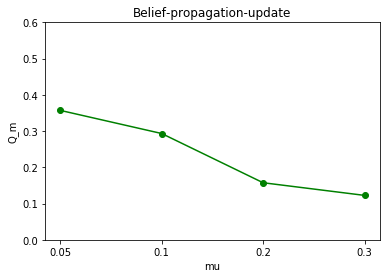

In [104]:
### varying mu new
r_y = {}
for key in rp.keys():
    if rp[key]['alpha'] == '0.6' and rp[key]['p'] == '0.8' and rp[key]['p1']== '0.8' and rp[key]['p2']=='0.0':
        r_y[rp[key]['mu']]=(mod[key])

x = []
y = []
for key in sorted(r_y.keys()):
    y.append(r_y[key])
    x.append(key)
import matplotlib.pyplot as plt
print(x,y)

# plot a line chart
plt.plot(x, y, 'o-g')
# set axis titles
plt.xlabel("mu")
plt.ylim(0.0, 0.6)
plt.ylabel("Q_m")
# set chart title
plt.title("Belief-propagation-update")
plt.show()

(['0.2', '0.4', '0.6', '0.8'], [0.21240507276635742, 0.23693851199608412, 0.33226399466431716, 0.35714741863125166])


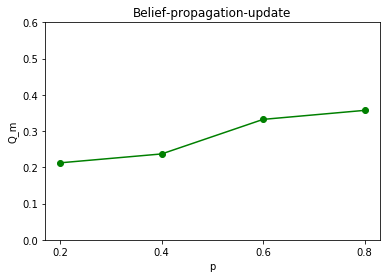

In [105]:
### varying p 

r_y = {}
for key in rp.keys():
    if rp[key]['alpha'] == '0.6' and rp[key]['mu'] == '0.05' and rp[key]['p1']== '0.8' and rp[key]['p2']=='0.0':
        r_y[rp[key]['p']]=(mod[key])

x = []
y = []
for key in sorted(r_y.keys()):
    y.append(r_y[key])
    x.append(key)
import matplotlib.pyplot as plt
print(x,y)

# plot a line chart
plt.plot(x, y, 'o-g')
# set axis titles
plt.xlabel("p")
plt.ylim(0.0, 0.6)
plt.ylabel("Q_m")
# set chart title
plt.title("Belief-propagation-update")
plt.show()

(['0.2', '0.4', '0.6', '0.8'], [0.22338389500958125, 0.23596567034801802, 0.253725998934284, 0.35714741863125166])


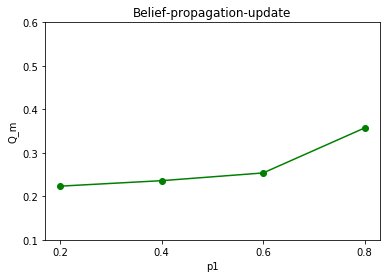

In [106]:
### varying p1 new

r_y = {}
for key in rp.keys():
    if rp[key]['alpha'] == '0.6' and rp[key]['mu'] == '0.05' and rp[key]['p']== '0.8' and rp[key]['p2']=='0.0':
        r_y[rp[key]['p1']]=(mod[key])

x = []
y = []
for key in sorted(r_y.keys()):
    y.append(r_y[key])
    x.append(key)
import matplotlib.pyplot as plt
print(x,y)

# plot a line chart
plt.plot(x, y, 'o-g')
# set axis titles
plt.xlabel("p1")
plt.ylim(0.1, 0.6)
plt.ylabel("Q_m")
# set chart title
plt.title("Belief-propagation-update")
plt.show()

(['0.0', '0.1', '0.2', '0.3'], [0.35714741863125166, 0.30542588554905803, 0.3831421822145909, 0.3565959480079806])


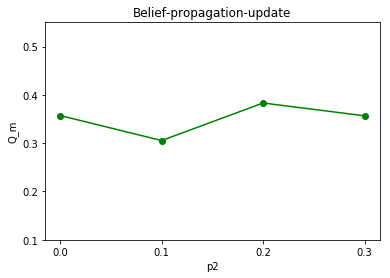

In [107]:
### varying p2 new

r_y = {}
for key in rp.keys():
    if rp[key]['alpha'] == '0.6' and rp[key]['mu'] == '0.05' and rp[key]['p1']== '0.8' and rp[key]['p']=='0.8':
        r_y[rp[key]['p2']]=(mod[key])

x = []
y = []
for key in sorted(r_y.keys()):
    y.append(r_y[key])
    x.append(key)
import matplotlib.pyplot as plt
print(x,y)

# plot a line chart
plt.plot(x, y, 'o-g')
# set axis titles
plt.xlabel("p2")
plt.ylim(0.1, 0.55)
plt.ylabel("Q_m")
# set chart title
plt.title("Belief-propagation-update")
plt.show()

In [13]:
import numpy as np

In [14]:
def layer_vec(layer):
    layer_vecs = []
    for key in layer.keys():
        for item in layer[key]:
            layer_vecs.append((key-1))
    return layer_vecs

In [15]:
def edge_list(node):
    intra = []
    edges = {}
    for key in node.keys():
        for item in node[key]:
            edges[(min(key,item))] = (max(key,item))
    for key in edges.keys():
        intra.append([key,edges[key]])
    return intra    

In [16]:
weighted = 0

In [19]:
mp = {}
for filename in onlyfiles:
    ml_network, layer, node_l, node_c, top, bot, couple, edge_l, edge_c, mu, commu = read_raw_network(mypath+filename,weighted)
    mp[filename] = {'layer_vec':layer_vec(layer),'intra_edges':edge_list(node_l),'inter_edges':edge_list(node_c)}

./netsForcomparingBaseline/_networks/network_0.8_0.8_0.05_0.4_0.1_6
./netsForcomparingBaseline/_networks/network_0.8_0.8_0.05_0.4_0.1_6 -1
./netsForcomparingBaseline/_networks/network_0.8_0.4_0.05_0.2_0.1_6
./netsForcomparingBaseline/_networks/network_0.8_0.4_0.05_0.2_0.1_6 -1
./netsForcomparingBaseline/_networks/network_0.4_0.4_0.3_0.8_0.1_6
./netsForcomparingBaseline/_networks/network_0.4_0.4_0.3_0.8_0.1_6 -1
./netsForcomparingBaseline/_networks/network_0.6_0.2_0.3_0.6_0.3_6
./netsForcomparingBaseline/_networks/network_0.6_0.2_0.3_0.6_0.3_6 -1
./netsForcomparingBaseline/_networks/network_0.6_0.2_0.3_0.8_0.0_6
./netsForcomparingBaseline/_networks/network_0.6_0.2_0.3_0.8_0.0_6 -1
./netsForcomparingBaseline/_networks/network_0.2_0.4_0.3_0.2_0.1_6
./netsForcomparingBaseline/_networks/network_0.2_0.4_0.3_0.2_0.1_6 -1
./netsForcomparingBaseline/_networks/network_0.6_0.6_0.2_0.2_0.2_6
./netsForcomparingBaseline/_networks/network_0.6_0.6_0.2_0.2_0.2_6 -1
./netsForcomparingBaseline/_networks/

./netsForcomparingBaseline/_networks/network_0.8_0.8_0.1_0.4_0.1_6
./netsForcomparingBaseline/_networks/network_0.8_0.8_0.1_0.4_0.1_6 -1
./netsForcomparingBaseline/_networks/network_0.2_0.8_0.1_0.8_0.2_6
./netsForcomparingBaseline/_networks/network_0.2_0.8_0.1_0.8_0.2_6 -1
./netsForcomparingBaseline/_networks/network_0.6_0.8_0.2_0.2_0.0_6
./netsForcomparingBaseline/_networks/network_0.6_0.8_0.2_0.2_0.0_6 -1
./netsForcomparingBaseline/_networks/network_0.2_0.4_0.05_0.4_0.2_6
./netsForcomparingBaseline/_networks/network_0.2_0.4_0.05_0.4_0.2_6 -1
./netsForcomparingBaseline/_networks/network_0.8_0.8_0.2_0.4_0.0_6
./netsForcomparingBaseline/_networks/network_0.8_0.8_0.2_0.4_0.0_6 -1
./netsForcomparingBaseline/_networks/network_0.8_0.2_0.1_0.4_0.3_6
./netsForcomparingBaseline/_networks/network_0.8_0.2_0.1_0.4_0.3_6 -1
./netsForcomparingBaseline/_networks/network_0.4_0.8_0.1_0.2_0.0_6
./netsForcomparingBaseline/_networks/network_0.4_0.8_0.1_0.2_0.0_6 -1
./netsForcomparingBaseline/_networks/ne

./netsForcomparingBaseline/_networks/network_0.2_0.4_0.1_0.4_0.3_6 -1
./netsForcomparingBaseline/_networks/network_0.2_0.8_0.05_0.8_0.3_6
./netsForcomparingBaseline/_networks/network_0.2_0.8_0.05_0.8_0.3_6 -1
./netsForcomparingBaseline/_networks/network_0.2_0.2_0.05_0.4_0.1_6
./netsForcomparingBaseline/_networks/network_0.2_0.2_0.05_0.4_0.1_6 -1
./netsForcomparingBaseline/_networks/network_0.2_0.4_0.1_0.4_0.2_6
./netsForcomparingBaseline/_networks/network_0.2_0.4_0.1_0.4_0.2_6 -1
./netsForcomparingBaseline/_networks/network_0.2_0.8_0.05_0.2_0.2_6
./netsForcomparingBaseline/_networks/network_0.2_0.8_0.05_0.2_0.2_6 -1
./netsForcomparingBaseline/_networks/network_0.4_0.2_0.05_0.8_0.1_6
./netsForcomparingBaseline/_networks/network_0.4_0.2_0.05_0.8_0.1_6 -1
./netsForcomparingBaseline/_networks/network_0.8_0.4_0.2_0.4_0.2_6
./netsForcomparingBaseline/_networks/network_0.8_0.4_0.2_0.4_0.2_6 -1
./netsForcomparingBaseline/_networks/network_0.2_0.6_0.2_0.8_0.0_6
./netsForcomparingBaseline/_netwo

./netsForcomparingBaseline/_networks/network_0.2_0.8_0.1_0.2_0.1_6
./netsForcomparingBaseline/_networks/network_0.2_0.8_0.1_0.2_0.1_6 -1
./netsForcomparingBaseline/_networks/network_0.8_0.2_0.05_0.4_0.2_6
./netsForcomparingBaseline/_networks/network_0.8_0.2_0.05_0.4_0.2_6 -1
./netsForcomparingBaseline/_networks/network_0.4_0.8_0.2_0.6_0.2_6
./netsForcomparingBaseline/_networks/network_0.4_0.8_0.2_0.6_0.2_6 -1
./netsForcomparingBaseline/_networks/network_0.4_0.8_0.2_0.4_0.3_6
./netsForcomparingBaseline/_networks/network_0.4_0.8_0.2_0.4_0.3_6 -1
./netsForcomparingBaseline/_networks/network_0.2_0.2_0.05_0.8_0.2_6
./netsForcomparingBaseline/_networks/network_0.2_0.2_0.05_0.8_0.2_6 -1
./netsForcomparingBaseline/_networks/network_0.2_0.6_0.3_0.4_0.0_6
./netsForcomparingBaseline/_networks/network_0.2_0.6_0.3_0.4_0.0_6 -1
./netsForcomparingBaseline/_networks/network_0.6_0.4_0.1_0.6_0.2_6
./netsForcomparingBaseline/_networks/network_0.6_0.4_0.1_0.6_0.2_6 -1
./netsForcomparingBaseline/_networks/

./netsForcomparingBaseline/_networks/network_0.2_0.2_0.2_0.4_0.0_6 -1
./netsForcomparingBaseline/_networks/network_0.4_0.8_0.2_0.2_0.0_6
./netsForcomparingBaseline/_networks/network_0.4_0.8_0.2_0.2_0.0_6 -1
./netsForcomparingBaseline/_networks/network_0.6_0.6_0.3_0.8_0.2_6
./netsForcomparingBaseline/_networks/network_0.6_0.6_0.3_0.8_0.2_6 -1
./netsForcomparingBaseline/_networks/network_0.4_0.6_0.1_0.4_0.0_6
./netsForcomparingBaseline/_networks/network_0.4_0.6_0.1_0.4_0.0_6 -1
./netsForcomparingBaseline/_networks/network_0.2_0.2_0.1_0.8_0.0_6
./netsForcomparingBaseline/_networks/network_0.2_0.2_0.1_0.8_0.0_6 -1
./netsForcomparingBaseline/_networks/network_0.2_0.2_0.05_0.8_0.1_6
./netsForcomparingBaseline/_networks/network_0.2_0.2_0.05_0.8_0.1_6 -1
./netsForcomparingBaseline/_networks/network_0.8_0.4_0.05_0.8_0.0_6
./netsForcomparingBaseline/_networks/network_0.8_0.4_0.05_0.8_0.0_6 -1
./netsForcomparingBaseline/_networks/network_0.8_0.8_0.3_0.4_0.2_6
./netsForcomparingBaseline/_networks/

./netsForcomparingBaseline/_networks/network_0.4_0.8_0.3_0.2_0.1_6 -1
./netsForcomparingBaseline/_networks/network_0.2_0.6_0.05_0.6_0.0_6
./netsForcomparingBaseline/_networks/network_0.2_0.6_0.05_0.6_0.0_6 -1
./netsForcomparingBaseline/_networks/network_0.6_0.4_0.2_0.4_0.2_6
./netsForcomparingBaseline/_networks/network_0.6_0.4_0.2_0.4_0.2_6 -1
./netsForcomparingBaseline/_networks/network_0.2_0.8_0.1_0.2_0.3_6
./netsForcomparingBaseline/_networks/network_0.2_0.8_0.1_0.2_0.3_6 -1
./netsForcomparingBaseline/_networks/network_0.2_0.8_0.3_0.2_0.2_6
./netsForcomparingBaseline/_networks/network_0.2_0.8_0.3_0.2_0.2_6 -1
./netsForcomparingBaseline/_networks/network_0.4_0.8_0.2_0.4_0.2_6
./netsForcomparingBaseline/_networks/network_0.4_0.8_0.2_0.4_0.2_6 -1
./netsForcomparingBaseline/_networks/network_0.2_0.4_0.1_0.6_0.1_6
./netsForcomparingBaseline/_networks/network_0.2_0.4_0.1_0.6_0.1_6 -1
./netsForcomparingBaseline/_networks/network_0.4_0.2_0.2_0.8_0.2_6
./netsForcomparingBaseline/_networks/ne

./netsForcomparingBaseline/_networks/network_0.2_0.6_0.3_0.2_0.3_6 -1
./netsForcomparingBaseline/_networks/network_0.6_0.8_0.2_0.6_0.1_6
./netsForcomparingBaseline/_networks/network_0.6_0.8_0.2_0.6_0.1_6 -1
./netsForcomparingBaseline/_networks/network_0.4_0.4_0.1_0.8_0.3_6
./netsForcomparingBaseline/_networks/network_0.4_0.4_0.1_0.8_0.3_6 -1
./netsForcomparingBaseline/_networks/network_0.6_0.8_0.2_0.8_0.1_6
./netsForcomparingBaseline/_networks/network_0.6_0.8_0.2_0.8_0.1_6 -1
./netsForcomparingBaseline/_networks/network_0.6_0.4_0.2_0.2_0.2_6
./netsForcomparingBaseline/_networks/network_0.6_0.4_0.2_0.2_0.2_6 -1
./netsForcomparingBaseline/_networks/network_0.4_0.8_0.2_0.6_0.0_6
./netsForcomparingBaseline/_networks/network_0.4_0.8_0.2_0.6_0.0_6 -1
./netsForcomparingBaseline/_networks/network_0.6_0.2_0.05_0.4_0.0_6
./netsForcomparingBaseline/_networks/network_0.6_0.2_0.05_0.4_0.0_6 -1
./netsForcomparingBaseline/_networks/network_0.8_0.6_0.3_0.6_0.3_6
./netsForcomparingBaseline/_networks/ne

./netsForcomparingBaseline/_networks/network_0.4_0.6_0.2_0.4_0.1_6
./netsForcomparingBaseline/_networks/network_0.4_0.6_0.2_0.4_0.1_6 -1
./netsForcomparingBaseline/_networks/network_0.6_0.6_0.1_0.8_0.3_6
./netsForcomparingBaseline/_networks/network_0.6_0.6_0.1_0.8_0.3_6 -1
./netsForcomparingBaseline/_networks/network_0.4_0.4_0.05_0.2_0.3_6
./netsForcomparingBaseline/_networks/network_0.4_0.4_0.05_0.2_0.3_6 -1
./netsForcomparingBaseline/_networks/network_0.2_0.2_0.05_0.4_0.0_6
./netsForcomparingBaseline/_networks/network_0.2_0.2_0.05_0.4_0.0_6 -1
./netsForcomparingBaseline/_networks/network_0.6_0.8_0.3_0.6_0.1_6
./netsForcomparingBaseline/_networks/network_0.6_0.8_0.3_0.6_0.1_6 -1
./netsForcomparingBaseline/_networks/network_0.4_0.6_0.3_0.4_0.2_6
./netsForcomparingBaseline/_networks/network_0.4_0.6_0.3_0.4_0.2_6 -1
./netsForcomparingBaseline/_networks/network_0.2_0.8_0.1_0.2_0.2_6
./netsForcomparingBaseline/_networks/network_0.2_0.8_0.1_0.2_0.2_6 -1
./netsForcomparingBaseline/_networks/

./netsForcomparingBaseline/_networks/network_0.6_0.2_0.3_0.6_0.1_6 -1
./netsForcomparingBaseline/_networks/network_0.2_0.2_0.1_0.8_0.2_6
./netsForcomparingBaseline/_networks/network_0.2_0.2_0.1_0.8_0.2_6 -1
./netsForcomparingBaseline/_networks/network_0.4_0.6_0.05_0.6_0.0_6
./netsForcomparingBaseline/_networks/network_0.4_0.6_0.05_0.6_0.0_6 -1
./netsForcomparingBaseline/_networks/network_0.2_0.4_0.2_0.4_0.2_6
./netsForcomparingBaseline/_networks/network_0.2_0.4_0.2_0.4_0.2_6 -1
./netsForcomparingBaseline/_networks/network_0.4_0.6_0.2_0.4_0.3_6
./netsForcomparingBaseline/_networks/network_0.4_0.6_0.2_0.4_0.3_6 -1
./netsForcomparingBaseline/_networks/network_0.4_0.2_0.05_0.2_0.3_6
./netsForcomparingBaseline/_networks/network_0.4_0.2_0.05_0.2_0.3_6 -1
./netsForcomparingBaseline/_networks/network_0.6_0.4_0.1_0.8_0.2_6
./netsForcomparingBaseline/_networks/network_0.6_0.4_0.1_0.8_0.2_6 -1
./netsForcomparingBaseline/_networks/network_0.2_0.6_0.2_0.4_0.0_6
./netsForcomparingBaseline/_networks/

./netsForcomparingBaseline/_networks/network_0.6_0.6_0.2_0.2_0.3_6
./netsForcomparingBaseline/_networks/network_0.6_0.6_0.2_0.2_0.3_6 -1
./netsForcomparingBaseline/_networks/network_0.8_0.4_0.1_0.8_0.0_6
./netsForcomparingBaseline/_networks/network_0.8_0.4_0.1_0.8_0.0_6 -1
./netsForcomparingBaseline/_networks/network_0.6_0.4_0.3_0.6_0.0_6
./netsForcomparingBaseline/_networks/network_0.6_0.4_0.3_0.6_0.0_6 -1
./netsForcomparingBaseline/_networks/network_0.4_0.8_0.3_0.4_0.1_6
./netsForcomparingBaseline/_networks/network_0.4_0.8_0.3_0.4_0.1_6 -1
./netsForcomparingBaseline/_networks/network_0.6_0.6_0.05_0.8_0.2_6
./netsForcomparingBaseline/_networks/network_0.6_0.6_0.05_0.8_0.2_6 -1
./netsForcomparingBaseline/_networks/network_0.6_0.2_0.2_0.8_0.0_6
./netsForcomparingBaseline/_networks/network_0.6_0.2_0.2_0.8_0.0_6 -1
./netsForcomparingBaseline/_networks/network_0.6_0.8_0.2_0.4_0.0_6
./netsForcomparingBaseline/_networks/network_0.6_0.8_0.2_0.4_0.0_6 -1
./netsForcomparingBaseline/_networks/ne

./netsForcomparingBaseline/_networks/network_0.2_0.2_0.05_0.6_0.2_6 -1
./netsForcomparingBaseline/_networks/network_0.4_0.8_0.1_0.6_0.3_6
./netsForcomparingBaseline/_networks/network_0.4_0.8_0.1_0.6_0.3_6 -1
./netsForcomparingBaseline/_networks/network_0.2_0.2_0.1_0.4_0.0_6
./netsForcomparingBaseline/_networks/network_0.2_0.2_0.1_0.4_0.0_6 -1
./netsForcomparingBaseline/_networks/network_0.6_0.2_0.1_0.2_0.2_6
./netsForcomparingBaseline/_networks/network_0.6_0.2_0.1_0.2_0.2_6 -1
./netsForcomparingBaseline/_networks/network_0.8_0.8_0.1_0.6_0.0_6
./netsForcomparingBaseline/_networks/network_0.8_0.8_0.1_0.6_0.0_6 -1
./netsForcomparingBaseline/_networks/network_0.6_0.2_0.1_0.8_0.1_6
./netsForcomparingBaseline/_networks/network_0.6_0.2_0.1_0.8_0.1_6 -1
./netsForcomparingBaseline/_networks/network_0.8_0.4_0.3_0.4_0.0_6
./netsForcomparingBaseline/_networks/network_0.8_0.4_0.3_0.4_0.0_6 -1
./netsForcomparingBaseline/_networks/network_0.2_0.6_0.3_0.8_0.2_6
./netsForcomparingBaseline/_networks/net

./netsForcomparingBaseline/_networks/network_0.4_0.6_0.1_0.8_0.3_6 -1
./netsForcomparingBaseline/_networks/network_0.4_0.8_0.1_0.8_0.0_6
./netsForcomparingBaseline/_networks/network_0.4_0.8_0.1_0.8_0.0_6 -1
./netsForcomparingBaseline/_networks/network_0.6_0.6_0.3_0.2_0.2_6
./netsForcomparingBaseline/_networks/network_0.6_0.6_0.3_0.2_0.2_6 -1
./netsForcomparingBaseline/_networks/network_0.2_0.8_0.2_0.4_0.2_6
./netsForcomparingBaseline/_networks/network_0.2_0.8_0.2_0.4_0.2_6 -1
./netsForcomparingBaseline/_networks/network_0.4_0.4_0.1_0.6_0.3_6
./netsForcomparingBaseline/_networks/network_0.4_0.4_0.1_0.6_0.3_6 -1
./netsForcomparingBaseline/_networks/network_0.6_0.4_0.05_0.2_0.2_6
./netsForcomparingBaseline/_networks/network_0.6_0.4_0.05_0.2_0.2_6 -1
./netsForcomparingBaseline/_networks/network_0.4_0.6_0.05_0.4_0.0_6
./netsForcomparingBaseline/_networks/network_0.4_0.6_0.05_0.4_0.0_6 -1
./netsForcomparingBaseline/_networks/network_0.2_0.8_0.3_0.4_0.2_6
./netsForcomparingBaseline/_networks/

./netsForcomparingBaseline/_networks/network_0.4_0.2_0.3_0.4_0.2_6 -1
./netsForcomparingBaseline/_networks/network_0.2_0.8_0.2_0.2_0.3_6
./netsForcomparingBaseline/_networks/network_0.2_0.8_0.2_0.2_0.3_6 -1
./netsForcomparingBaseline/_networks/network_0.6_0.2_0.05_0.2_0.3_6
./netsForcomparingBaseline/_networks/network_0.6_0.2_0.05_0.2_0.3_6 -1
./netsForcomparingBaseline/_networks/network_0.6_0.4_0.3_0.2_0.1_6
./netsForcomparingBaseline/_networks/network_0.6_0.4_0.3_0.2_0.1_6 -1
./netsForcomparingBaseline/_networks/network_0.6_0.6_0.3_0.6_0.2_6
./netsForcomparingBaseline/_networks/network_0.6_0.6_0.3_0.6_0.2_6 -1
./netsForcomparingBaseline/_networks/network_0.8_0.2_0.05_0.4_0.1_6
./netsForcomparingBaseline/_networks/network_0.8_0.2_0.05_0.4_0.1_6 -1
./netsForcomparingBaseline/_networks/network_0.2_0.6_0.2_0.4_0.1_6
./netsForcomparingBaseline/_networks/network_0.2_0.6_0.2_0.4_0.1_6 -1
./netsForcomparingBaseline/_networks/network_0.8_0.6_0.3_0.2_0.2_6
./netsForcomparingBaseline/_networks/

In [22]:
import pickle as pkl

In [23]:
with open('data_dictionary.pkl', 'wb') as f:
    pkl.dump(mp, f)

In [18]:
import networkx as nx
import random
import pickle
import os
import sys
import math
from sklearn.metrics import *
# from mixmod_wt.Status import Status
from mixmod_wt.mixmod_wt_correctingImplementation_without_half import __modularity
#from mixmod_wt.modularity_LFR_our import getModularityQ as __modularity
from collections import defaultdict
#import matplotlib.pyplot as plt
from mixmod_wt.aux import _get_com_wise_nodes, printsomeinformation, read_raw_network
from multiprocessing import Pool
from pprint import pprint

__PASS_MAX = 100
__MIN = 0.0000001
#modctr = 0


def is_multi_layer(e1, e2, node_c):
    if e2 in node_c and e1 in node_c[e2]:
        return True
    return False


def is_commu(e1, e2, commu):
    for c in commu:
        if e1 in commu[c] and e2 in commu[c]:
            return True
    return False


def partition_at_level(dendogram, level):
    partition = dendogram[0].copy()
    for index in range(1, level + 1):
        for node, community in partition.items():
            partition[node] = dendogram[index][community]
    return partition


def __renumber(dictionary):
    count = 1
    #count = 0
    ret = dictionary.copy()
    new_values = dict([])

    for key in dictionary.keys():
        value = dictionary[key]
        new_value = new_values.get(value, -1)
        if new_value == -1:
            new_values[value] = count
            new_value = count
            count = count + 1
        ret[key] = new_value

    return ret


def _get_commu_dict(node2com):
    commu = {}
    count = 1
    new_values = dict([])
    for n in node2com.keys():
        v = node2com[n]
        new_value = new_values.get(v, -1)
        if new_value == -1:
            new_values[v] = count
            new_value = count
            commu[new_value] = set()
            count = count + 1
        commu[new_value].add(n)
    return commu


def __neighcom(node, graph, status):
    weights = []
    for neighbor in graph[node]:
        if neighbor != node:
            neighborcom = status.node2com[neighbor]
            weights.append(neighborcom)
    return weights


# New __one_level function (from Raphael's code)
def __one_level(original_graph, original_status, graph, status, status_list, level_count, verbose=0):
    ##print("graph edges: ",graph.edges(data = True))
    modif = True
    modif_global = False
    nb_pass_done = 0

    # print "Status List length, level_count ",len(status_list),level_count
    if level_count == 1:
        verbose = True
    # GROUPING VERTICES IN SAME COMMUNITY BUT DIFFERENT LAYERS----------------
    group = {}

    for node1 in status.node2com:
        com1 = status.node2com[node1]
        for node2 in status.node2com:
            com2 = status.node2com[node2]
            if com1 == com2:
                if node1 not in group:
                    group[node1] = set()
                group[node1].add(node2)
    # pprint(status.node2com)
    # if(move_in_group ==1):
    #	sys.exit()
    # ----------------------------------------------------------------------

    ffff = 0
    while modif and nb_pass_done != __PASS_MAX:
        modif = False
        nb_pass_done += 1
        move_in_group = 0
        # no_move=set()

        v = list(graph.nodes())
        random.shuffle(v)
        for node in v:
            print("for node:", node)

            '''### CHECKING IF THE CORRESPONDING GROUP HAS ALREADY BEEN CONSIDERED
			if node in no_move:
				continue
			'''
            move_in_group = 0
            com_node = status.node2com[node]

            best_com = com_node
            best_increase = 0

            status_list.append(status.node2com)
            original_status.node2com = partition_at_level(
                status_list, level_count)

            base_mod = __modularity(_get_commu_dict(partition_at_level(
                status_list, level_count)), original_status, original_graph)
            if ffff == 0:
                # print "base_mod, level ",base_mod,level_count,len(status_list)
                ffff = 1

            neigh_communities = __neighcom(node, graph, status)

            extended_neigh_communities = __neighcom(node, graph, status)
            # EXTENDING NEIGHBORHOOD BY NEIGHBORS OF THE NODES IN THE SAME GROUP
            if node in group:
                for node1 in group[node]:
                    extended_neigh_communities.extend(
                        __neighcom(node1, graph, status))

            for com in neigh_communities:

                # MODIFYING NODE2COM FOR ALL NODES IN SAME GROUP
                status.node2com[node] = com

                '''if node in group:
					for node1 in group[node]:
						status.node2com[node1] = com						
				'''
                status_list.append(status.node2com)
                original_status.node2com = partition_at_level(
                    status_list, level_count)

                incr = __modularity(_get_commu_dict(partition_at_level(
                    status_list, level_count)), original_status, original_graph) - base_mod

                if incr > best_increase:
                    best_increase = incr
                    best_com = com

                status_list.pop()

            for com in extended_neigh_communities:

                # MODIFYING NODE2COM FOR ALL NODES IN SAME GROUP
                status.node2com[node] = com
                if node in group:
                    for node1 in group[node]:
                        status.node2com[node1] = com

                status_list.append(status.node2com)
                original_status.node2com = partition_at_level(
                    status_list, level_count)

                incr = __modularity(_get_commu_dict(partition_at_level(
                    status_list, level_count)), original_status, original_graph) - base_mod

                if incr > best_increase:
                    move_in_group = 1
                    best_increase = incr
                    best_com = com

                status_list.pop()

            # if com_node != best_com:
            #	if verbose:
            #		#print "node",node,"moved from", com_node, "to", best_com,":", best_increase

            if(move_in_group == 0):
                if node in group:  # REVERT ALL NODES IN GROUP TO ORIGINAL COMMUNITY
                    for node1 in group[node]:
                        status.node2com[node1] = com_node
                status.node2com[node] = best_com
            else:
                # UPDATING NODE2COM FOR ALL NODES IN SAME GROUP
                # ADDING GROUP NODES IN NO_MOVE
                status.node2com[node] = best_com
                if node in group:
                    for node1 in group[node]:
                        status.node2com[node1] = best_com
                        # no_move.add(node1)

            print("move in group: {0} , prev com: {1}, best_com: {2}".format(
                move_in_group, com_node, best_com))

            #p_temp = __renumber(status.node2com)
            #p_temp = status.node2com
            # status_list.append(p_temp)
            # print __modularity(_get_com_wise_nodes(status_list[-1]), status, original_graph)
            # status_list.pop()

            original_status.node2com = partition_at_level(
                status_list, level_count)

            status_list.pop()

            if best_com != com_node:
                modif = True
                modif_global = True

        p_temp = status.node2com
        status_list.append(p_temp)
        new_mod = __modularity(_get_com_wise_nodes(partition_at_level(
            status_list, level_count)), original_status, original_graph)

        # print "In __one_level new_mod: ", new_mod
        #		if(verbose): #print("Status list[-1]: ",status_list[-1])

        status_list.pop()
        if modif == False:
            break
    return modif_global

    #__modularity(_get_commu_dict(status_list[-1]), status)


def induced_graph_multilayer(partition, graph, status):
    new_layer = defaultdict(set)
    new_node_l = defaultdict(set)
    new_node_c = defaultdict(set)
    new_couple = defaultdict(set)
    layer = status.layer

    ret = nx.Graph()
    #id_extra_com = len(partition) + 1
    id_extra_com = max(partition.values()) + 1

    list_node_com = {}
    part = {}

    partition_rebuild = {}
    for id_node in partition:
        partition_rebuild.setdefault(partition[id_node], [])
        partition_rebuild[partition[id_node]].append(id_node)

    # print "Partition ",partition
    # print "Partition Rebuild ",partition_rebuild

    for id_com in partition_rebuild.keys():

        layer_node = {}
        is_top = False
        is_bot = False
        for id_node in partition_rebuild[id_com]:
            if id_node in layer[1]:
                layer_node[id_node] = 1
                is_top = True
            else:
                layer_node[id_node] = 2
                is_bot = True

        if is_top and is_bot:  # add two nodes into induced graph
            ret.add_node(id_com)
            ret.add_node(id_extra_com)
            ##print("idcom: ", id_com, "idextracom: ",id_extra_com)
            # updating status
            new_layer[1].add(id_com)
            new_layer[2].add(id_extra_com)
            ###

            part[id_com] = id_com
            # id_extra_com will be remain with id_com community
            part[id_extra_com] = id_com

            for id_node in layer_node:
                if layer_node[id_node] == 1:
                    list_node_com[id_node] = id_com
                else:
                    list_node_com[id_node] = id_extra_com

            id_extra_com += 1

        else:  # add one node into induced graph
            ret.add_node(id_com)
            ##print("idcom: ", id_com)
            # updating status
            if(is_top):
                new_layer[1].add(id_com)
            elif(is_bot):
                new_layer[2].add(id_com)
            #######

            part[id_com] = id_com

            for id_node in layer_node:
                #part[id_node] = id_com
                list_node_com[id_node] = id_com

    for node1, node2, datas in graph.edges_iter(data=True):
        weight = datas.get("weight", 1)
        com1 = list_node_com[node1]
        com2 = list_node_com[node2]
        if(com1 == com2 and node1 != node2):			 # EXCEPT for selfloops add double edge weights
            weight *= 2
        w_prec = ret.get_edge_data(com1, com2, {"weight": 0}).get("weight", 1)
        ret.add_edge(com1, com2, weight=w_prec + weight)

    # updating status
    for node1, node2 in ret.edges_iter():
        # if((node1 in layer[1] and node2 in layer[1]) or (node1 in layer[2] and node2 in layer[2])):
        if((node1 in new_layer[1] and node2 in new_layer[1]) or (node1 in new_layer[2] and node2 in new_layer[2])):
            # add to node_l
            new_node_l[node1].add(node2)
            new_node_l[node2].add(node1)
        else:
            # add to node_c
            new_node_c[node1].add(node2)
            new_node_c[node2].add(node1)

    # updating partition (previous)
    for id_node in partition:
        partition[id_node] = list_node_com[id_node]

    # updating status
    new_couple[1] = set(ret.nodes())

    status.layer = new_layer
    status.couple = new_couple
    status.node_c = new_node_c
    status.node_l = new_node_l
    return ret, part, status


def louvain(graph, layer, node_l, node_c, top, bot, couple, edge_l, edge_c, mu):
    current_graph = graph.copy()
    status = Status()

    status.layer = layer
    status.node_l = node_l
    status.node_c = node_c
    status.top = top
    status.bot = bot
    status.edge_l = edge_l
    status.edge_c = edge_c
    status.couple = couple
    status.mu = mu

    status.init(current_graph)

    old_status = status.copy()

    status_list = list()
    level_count = 0

    mod = __modularity(_get_commu_dict(status.node2com), status, graph)
    # print "Modularity before First Iteration ",mod

    __one_level(graph, old_status, current_graph,
                status, status_list, level_count)
    partition = __renumber(status.node2com)
    status_list.append(partition)
    current_graph, part, status = induced_graph_multilayer(
        partition, current_graph, status)

    mod1 = __modularity(_get_com_wise_nodes(part), status, current_graph)

    p = _get_com_wise_nodes(partition_at_level(
        status_list, len(status_list)-1))
    new_mod = __modularity(p, old_status, graph)
    # print "-> merge mod after level 0 : ", mod1
    # print "-> Modularity after level 0: ",new_mod, "\n"

    ##print("Louvain, partition: ",partition)
    #print("Louvain partition: ",part)
    A = nx.adjacency_matrix(current_graph)
    # print(A.todense())

    status.init(current_graph)

    while True:
        level_count += 1
        # print level_count
        modif = __one_level(graph, old_status, current_graph,
                            status, status_list, level_count, 1)

        partition = __renumber(status.node2com)
        status_list.append(partition)

        new_mod = __modularity(_get_commu_dict(partition_at_level(
            status_list, level_count)), old_status, graph)
        # print "-> Modularity after level ",level_count,": ",new_mod, "\n"

        #new_mod = __modularity(_get_commu_dict(partition), status, current_graph)
        #new_mod = __modularity(_get_com_wise_nodes(partition), status, current_graph)

        if modif == False:
            # if new_mod - mod < __MIN :

            break
        mod = new_mod
        #current_graph = induced_graph(partition, current_graph)
        current_graph, part, status = induced_graph_multilayer(
            partition, current_graph, status)
        # status.init(current_graph)
        status.init(current_graph, part)

        ##print("Louvain, partition: ",partition)
        #		#print("Louvain, part after: ",part)
        #		A = nx.adjacency_matrix(current_graph)
        # print(A.todense())

    return status_list, mod


def computegtmod(filename, weighted):
    fnetwork = 0
    # with open(filename+'_ml_network.pickle') as handle:
    #	fnetwork = pickle.load(handle)
    ml_network, layer, node_l, node_c, top, bot, couple, edge_l, edge_c, mu, commu = read_raw_network(
        filename, weighted)

    status = Status()
    status.layer = layer
    status.node_l = node_l
    status.node_c = node_c
    status.top = top
    status.bot = bot
    status.edge_l = edge_l
    status.edge_c = edge_c
    status.couple = couple
    status.mu = mu
    mod = __modularity(commu, status, ml_network)
    return mod, commu


def compute_nmi(gtcom, dtcom):
    num_nodes = 200
    true_labels = [None]*num_nodes
    pred_labels = [None]*num_nodes

    linenum = 1
    for commu in gtcom:
        for c in list(gtcom[commu]):
            true_labels[c-1] = linenum
        linenum += 1
    linenum = 1
    for d in dtcom:
        for node in list(dtcom[d]):
            pred_labels[node-1] = linenum
        linenum += 1

    # Normalised mutual information. Function present in sklearn.metrics. Do not forget to import.
    nmi = normalized_mutual_info_score(true_labels, pred_labels)
    ri = adjusted_rand_score(true_labels, pred_labels)
    return nmi, ri


def getSeries(filename, weighted):
    '''network_name = "networks_low_couple/" + filename.split('/')[-1]

    # commented code block 	
            fp=open(network_name,'r')
            line=fp.readline()
            line=line.rstrip()
            n_layer=int(line)
            layer={}
            node_l={}
            l_ID=1
            edge_l={}
            edge_c={}
            # f_el = open(filename+'_edges_list_commod'+str(g), 'w')
            for i in range(0,n_layer):
                    line=fp.readline()
                    line=line.rstrip()
                    line=line.split()
                    layer[l_ID]=set()
                    ##print line
                    for n in line:
                            layer[l_ID].add(int(n))
                    line=fp.readline()
                    line=int(line.rstrip())
                    n_edge=line
                    ##print n_edge
                    edge_l[l_ID]=n_edge
                    for j in range(0,n_edge):
                            line=fp.readline()
                            line=line.rstrip()
                            line=line.split()
                            n1=int(line[0])
                            n2=int(line[1]) 
                            if n1 not in node_l:
                                    node_l[n1]=set()
                            node_l[n1].add(n2)	  
                            if n2 not in node_l:
                                    node_l[n2]=set()
                            node_l[n2].add(n1)
                            # f_el.write(str(n1-1)+' '+str(n2-1)+'\n')

                    l_ID+=1

            line=fp.readline()
            line=line.rstrip()
            n_couple=int(line)
            ##print n_couple
            node_c={}	   
            top={}
            bot={}
            c_ID=1
            couple={}

            for i in range(0,n_couple):
                    line=fp.readline()
                    ##print line
                    line=line.rstrip()
                    line=line.split()
                    top[c_ID]=int(line[0])
                    bot[c_ID]=int(line[1])

                    couple[c_ID]=layer[top[c_ID]].union(layer[bot[c_ID]])

                    line=fp.readline()
                    line=int(line.rstrip())
                    n_edge=line
                    ##print n_edge
                    edge_c[c_ID]=n_edge
                    count_edge = 0
                    for j in range(0,n_edge):
                            line=fp.readline()
                            line=line.rstrip()
                            line=line.split()
                            n1=int(line[0])
                            n2=int(line[1])
                            if n1 not in node_c:
                                    node_c[n1]=set()
                            node_c[n1].add(n2)
                            if n2 not in node_c:
                                    node_c[n2]=set()
                            node_c[n2].add(n1)  
                            count_edge += 1
                            # f_el.write(str(n1-1)+' '+str(n2-1)+'\n')
                    edge_c[c_ID] = count_edge
                    c_ID=c_ID+1

            line=fp.readline()
            line=line.rstrip()
            ##print line
            n_comm=int(line)
            commu={}
            com_ID=1
            for i in range(0,n_comm):
                    line=fp.readline()
                    line=line.rstrip()
                    line=line.split()
                    commu[com_ID]=set()
                    for n in line:
                            commu[com_ID].add(int(n))
                    com_ID+=1	   
            mu=0'''

    # with open(filename+'_ml_network.pickle') as handle:
    #	fnetwork = pickle.load(handle)
    ml_network, layer, node_l, node_c, top, bot, couple, edge_l, edge_c, mu, commu = read_raw_network(
        filename, weighted)

    #ml_network =build_network(layer, node_l, node_c, top, bot, couple, edge_l, edge_c)
    # with open(filename+'_ml_network.pickle', 'w') as handle:
    #	 pickle.dump([ml_network, layer, node_l, node_c, top, bot, couple, edge_l, edge_c, mu, commu], handle)
    dendogram, mod = louvain(ml_network, layer, node_l,
                             node_c, top, bot, couple, edge_l, edge_c, mu)

    status = Status()
    status.layer = layer
    status.node_l = node_l
    status.node_c = node_c
    status.top = top
    status.bot = bot
    status.edge_l = edge_l
    status.edge_c = edge_c
    status.couple = couple
    status.mu = mu
    mod_old = mod
    commu = _get_com_wise_nodes(
        partition_at_level(dendogram, len(dendogram)-1))
    #commu =_get_commu_dict(partition_at_level(dendogram, len(dendogram)-1))
    mod = __modularity(commu, status, ml_network)
    # print "--------- BEF RET ---------"
    # print mod_old, mod
    # print "----------------"

    return mod, dendogram


def write_commus_infile(network, detected_commu, gtcom):
    # writting the detected communities-------------------------------
    detected_communities_file = open(
        pathtowritecommu+str(network)+".pickle", "w")
    pickle.dump((gtcom, detected_commu), detected_communities_file, 2)
    detected_communities_file.close()
    # -----------------------------------------------------------------


def generate_nmi_file(commu, louvain1):
    # print(type(commu))
    louvain_p = dict(louvain1)
    # print(type(louvain_p))
    true_labels = [None]*200
    for k, v in commu.items():
        for node in v:
            ##print("node: ",node)
            true_labels[node-1] = k

    predicted_labels = [None]*len(true_labels)
    for k, v in louvain_p.items():
        for node in v:
            ##print("node: ",node)
            predicted_labels[node-1] = k

    nmival = normalized_mutual_info_score(true_labels, predicted_labels)
    return nmival


def runonrealnets(networkpath, network, resultpath):
    weighted = 0
    str2 = networkpath + str(network)

    dtmod, dtcom = getSeries(str2, weighted)
    dtcom = _get_com_wise_nodes(partition_at_level(dtcom, len(dtcom)-1))
    with open(resultpath+'_commu_benching_frac.pickle', 'wb') as handle:
        pickle.dump(dtcom, handle)
    #gtmod,gtcom = computegtmod(str2,weighted)
    #output.append((gtmod, dtmod))
    #nmi = compute_nmi(gtcom,dtcom)


'''networklist = os.listdir('./Raphael_27.6.17/synthetics')
	pathtowritecommu = "./resultsmixmod/detected_communities/"
	pathtosave = './resultsmixmod/modularity_comparisions/'
	modfilename = pathtosave+"modComparisionMixModLouvain_wt_correctedImplementation_doinganything_nmi"
	nmifilename=modfilename+"_nmi"'''

# Comment following four lines if you want to run for all networks
#str2 = "./Networks/config1.txt"
# str2="./synthetics/network_0.6_0.5_0.05_1.0_0.0"
# str2 = "./nets/smallnetwork"
#modu, commus = getSeries(str2)
#x=_get_com_wise_nodes(partition_at_level(commus, len(commus)-1))
# print "Modularity Louvain: ", modu
# for xs in x:
#	#print xs,sorted(x[xs])

# gtres = computegtmod(str2)
# #print "Modularity GT: ", gtres[0]
# for xs in gtres[1]:
#  	#print xs,sorted(gtres[1][xs])

# sys.exit()


def runformanynetworks(args):
    output = []

    networklist = args[:-1]
    tmp = args[-1]
    weighted = args[-1][0]
    modfilename = args[-1][1]
    networkpath = args[-1][2]
    detectedCommuFile = args[-1][3]
    print(detectedCommuFile)
    for network in networklist:
        #str2 = "./nets/" + str(network)
        str2 = networkpath + str(network)
        # print "START For Network ",str2
        dtmod, dtcom = getSeries(str2, weighted)
        gtmod, gtcom = computegtmod(str2, weighted)
        output.append((gtmod, dtmod))

        dtcom = _get_com_wise_nodes(partition_at_level(dtcom, len(dtcom)-1))
        print(dtcom)
        nmi, ri = compute_nmi(gtcom, dtcom)

        ##print(str2+ ", " + str(gtmod) + ", " + str(dtmod))
        # break
        modfile = open(modfilename, 'a')
        modfile.write(str2 + ":	" + str(gtmod)+"  "+str(dtmod) +
                      "  "+str(nmi) + " "+str(ri)+"\n")
        modfile.close()

        # WRITE DETECTED COMMUNITIES TO FILE
        # p="./syntheticNetworkGeneration/netsForcomparingBaseline/results/"
        #p = "./syntheticNetworkGeneration/diggnetwork/"
        '''
		comfile = open(detectedCommuFile,'a')
		comfile.write(str2+":\n============================================================\n")
		comfile.write(str(len(dtcom))+"\n")
		for d in dtcom:
			towrite = ' '.join([str(node) for node in dtcom[d]])
			comfile.write(towrite + "\n")
		comfile.write("=======================================================\n")
		comfile.close()
		'''

    return output


def parallelimplementation(networklist, weighted, modfilename, networkpath, detectedCommuFile):
    # Open file to compare modularity values
    modfile = open(modfilename, 'w')
    modfile.write("network								   GroundTruth	Detected-Louvain\n")
    modfile.close()
    '''
	comfile = open(detectedCommuFile,'w')
	comfile.write("network								   Detected Communities\n")
	comfile.close()
	'''
    # Prepare args for parallel processings
    numnetworks = len(networklist)

    cores = 4
    chunksize = numnetworks/cores

    splits = []
    for i in range(cores):
        splits.append((i)*chunksize)
    splits.append(numnetworks)

    args = []
    for i in range(cores):
        arguments = networklist[splits[i]:splits[i+1]]
        tmp = [weighted, modfilename, networkpath, detectedCommuFile]
        arguments.append(tmp)
        args.append(arguments)

    p = Pool(cores)
    modularities = p.map(runformanynetworks, args)

    # Flatten list of lists returned by different cores
    modularities = [item for items in modularities for item in items]
    # print "lala"
    # print modularities
    return modularities


def main():
    weighted = 0

    networkpath = "./syntheticNetworkGeneration/newnetsForcomparingBaseline/_networks/"
    # networkpath="./syntheticNetworkGeneration/netsForcomparingBaseline/_networks/"
    # networkpath="./syntheticNetworkGeneration/netsForDtDmDb/_networks/morenets/alpha0.7/"
    # networkpath="./syntheticNetworkGeneration/netsForDtDmDb/_networks/netsByGenerateNetsv3/alpha0.7/"

    pathtosave = "./syntheticNetworkGeneration/newnetsForcomparingBaseline/results_ri/"
    # pathtosave="./syntheticNetworkGeneration/netsForcomparingBaseline/results_ri/"
    # pathtosave="./syntheticNetworkGeneration/results/nets121/alpha0.7/dt_db_mod_files_corrctImp_without_half/"
    # pathtosave="./syntheticNetworkGeneration/results/nets121_incWeights/alpha0.7/dt_db_mod_files_corrctImp_without_half/"

    networklist = os.listdir(networkpath)
    networklist = sorted(networklist)
    modfilename = pathtosave+"unionMixmod_QM"
    detectedCommuFile = "./syntheticNetworkGeneration/diggnetwork/digg_detected"
    #modfilename = pathtosave+"mixmod_mQ"
    #tmp = [weighted,modfilename,networkpath]
    # networklist.append(tmp)
    # runformanynetworks(networklist)
    parallelimplementation(networklist, weighted,
                           modfilename, networkpath, detectedCommuFile)
    sys.exit()

    networktypes = [70, 28]
    algonames = ["round1(without_half)", "round2(correctingImplementation)"]

    for networktype in networktypes:
        for algoname in algonames:

            if(algoname == "round1(without_half)"):
                from mixmod_wt.mixmod_wt_correctingImplementation_without_half import __modularity
            elif(algoname == "round2(correctingImplementation)"):
                from mixmod_wt.mixmod_wt_correctingImplementation import __modularity

            if(networktype == 70):
                networkpath = './Raphael_27.6.17/synthetics/'
            elif(networktype == 28):
                networkpath = './Raphael_27.6.17/net_networks/'

            modfilename = "./results/"+algoname+"/final0/" + \
                str(networktype) + \
                "/Mixmod_global_modu_not_global_low_couple_Final0.txt"
            #print("Output destination: ",modfilename)
            # nmifilename="Mixmod_global_nmi.txt"
            #networklist = os.listdir('./synthetics')
            networklist = os.listdir(networkpath)
            networklist = sorted(networklist)
            # runformanynetworks(networklist)
            parallelimplementation(networklist)

    sys.exit()

    # i = int(sys.argv[1])
    # p = float(sys.argv[2])
    # a = float(sys.argv[3])
    # mu = float(sys.argv[4])
    # d = float(sys.argv[5])

    # ##print p, a, mu, d
    # str1="./test"+str(i)+"/networks_alpha"+str(a)+"/"
    # str2=str1+"networks_p"+str(p)+"/networks_mu"+str(mu)+"/networks_density"+str(d)+"/new_format"
    # ##print str2
    # if not os.path.exists(str2) :
    #	 ##print p, a, mu, d
    #	 ##print "No"
    #	 exit()

    #modu, commus = getSeries(str2)

    # print "FINAL_MODULARITY*** ", modu

    '''with open(str2+'_commu_benching_all_march21_louvain_mixmod.pickle', 'wb') as handle:
		pickle.dump(partition_at_level(commus, len(commus)-1), handle)
	with open(str2+'_modu_benching_all_march21_louvain_mixmod.pickle', 'wb') as handle:
		pickle.dump(modu, handle)
	with open(str2+'_commu_benching_frac_march21_louvain_mixmod.pickle', 'wb') as handle:
		pickle.dump(commus, handle)
	##print ""'''
